# USING PRETRAINED WORD EMBEDDINGS

In [35]:
import os
%matplotlib inline

imdb_dir = 'E:\\Datasets\\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

# Load tha dataset

In [2]:
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            try:
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()

                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
            except:
                pass

In [3]:
print(len(labels))
print(len(texts))

24984
24984


In [4]:
print(labels[0])
print(texts[0])

0
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.


# Tekenize the raw IMDB text data

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

Using TensorFlow backend.


In [6]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [19]:
print(sequences[0])

[62, 4, 3, 129, 34, 45, 7648, 1412, 15, 3, 4267, 514, 43, 16, 3, 633, 133, 12, 6, 3, 1302, 460, 4, 1749, 209, 3, 7744, 308, 6, 677, 80, 32, 2138, 1111, 3016, 31, 1, 929, 4, 42, 5123, 469, 9, 2685, 1749, 1, 223, 55, 16, 54, 828, 1325, 856, 228, 9, 40, 96, 122, 1485, 56, 145, 36, 1, 997, 141, 26, 677, 122, 1, 411, 59, 94, 2282, 303, 773, 5, 3, 835, 20, 3, 1757, 647, 42, 125, 71, 22, 235, 101, 16, 46, 49, 624, 31, 710, 84, 710, 379, 3504, 2, 8430, 67, 26, 107, 3371]


In [28]:
word_index = tokenizer.word_index
print(word_index['a'])

3


In [9]:
print('Found %s unique tokens'%len(word_index))

Found 88413 unique tokens


In [11]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)

In [12]:
print(data[0])
print(labels[0])

[  34   45 7648 1412   15    3 4267  514   43   16    3  633  133   12    6
    3 1302  460    4 1749  209    3 7744  308    6  677   80   32 2138 1111
 3016   31    1  929    4   42 5123  469    9 2685 1749    1  223   55   16
   54  828 1325  856  228    9   40   96  122 1485   56  145   36    1  997
  141   26  677  122    1  411   59   94 2282  303  773    5    3  835   20
    3 1757  647   42  125   71   22  235  101   16   46   49  624   31  710
   84  710  379 3504    2 8430   67   26  107 3371]
0


In [13]:
print(data.shape)

(24984, 100)


In [14]:
print(labels.shape)

(24984,)


In [16]:
# Split the data into train and test, before that shuffles the data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
print(indices)

[12433  3548  4928 ..., 11712  8415 18871]


In [17]:
data = data[indices]
labels = labels[indices]

In [18]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [22]:
print(x_train.shape)
print(x_val.shape)

(200, 100)
(10000, 100)


# Parsing the GloVe Word-embedding file

In [25]:
glove_dir = 'E:\\Datasets\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors' % len(embeddings_index))

Found 400000 word vectors


In [26]:
print(embeddings_index['a'])

[-0.27085999  0.044006   -0.02026    -0.17395     0.6444      0.71213001
  0.35510001  0.47138    -0.29637     0.54426998 -0.72294003 -0.0047612
  0.040611    0.043236    0.29729     0.10725     0.40156001 -0.53662002
  0.033382    0.067396    0.64556003 -0.085523    0.14103     0.094539
  0.74947    -0.19400001 -0.68739003 -0.41740999 -0.22807001  0.12       -0.48999
  0.80944997  0.045138   -0.11898     0.20161     0.39276001 -0.20121001
  0.31354001  0.75304002  0.25907001 -0.11566    -0.029319    0.93498999
 -0.36067     0.52420002  0.23706     0.52714998  0.22869    -0.51958001
 -0.79348999 -0.20367999 -0.50186998  0.18748     0.94282001 -0.44834
 -3.67919993  0.044183   -0.26751     2.19970012  0.241      -0.033425
  0.69553    -0.64472002 -0.0072277   0.89574999  0.20015     0.46493
  0.61932999 -0.1066      0.08691    -0.4623      0.18262    -0.15849
  0.020791    0.19373     0.063426   -0.31672999 -0.48177001 -1.38479996
  0.13669001  0.96859002  0.049965   -0.27379999 -0.0356

In [31]:
# Preparing GloVe word embeding matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        # Get the vector from original GloVe data
        embedding_vector = embeddings_index.get(word)
        
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(10000, 100)


# Defining the model

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Load the pretrained word embeddings into the Embedding layer

In [32]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

### Training the model

In [33]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s - loss: 2.5245 - acc: 0.4850 - val_loss: 0.8799 - val_acc: 0.5019
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.5505 - acc: 0.7000 - val_loss: 0.7549 - val_acc: 0.5219
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.3181 - acc: 0.8900 - val_loss: 0.7108 - val_acc: 0.5527
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.4397 - acc: 0.7950 - val_loss: 0.7512 - val_acc: 0.5462
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.1299 - acc: 0.9900 - val_loss: 1.5309 - val_acc: 0.4987
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.3573 - acc: 0.7950 - val_loss: 0.8435 - val_acc: 0.5394
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.0641 - acc: 1.0000 - val_loss: 0.8166 - val_acc: 0.5547
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.0332 - acc: 1.0000 - val

# plotting the result

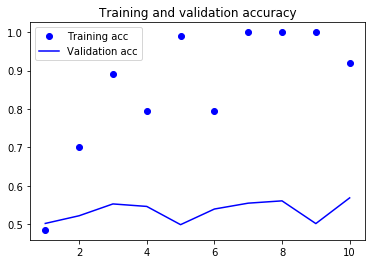

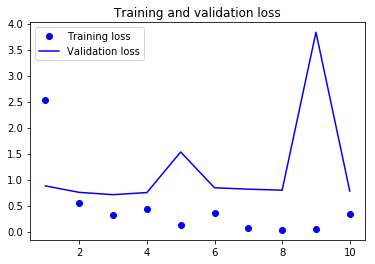

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Training the same model without pretrained word embeddngs

In [37]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s - loss: 0.6930 - acc: 0.5150 - val_loss: 0.6917 - val_acc: 0.5234
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.5079 - acc: 0.9800 - val_loss: 0.6925 - val_acc: 0.5237
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.2844 - acc: 1.0000 - val_loss: 0.6951 - val_acc: 0.5255
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.1253 - acc: 1.0000 - val_loss: 0.7092 - val_acc: 0.5268
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.0584 - acc: 1.0000 - val_loss: 0.7059 - val_acc: 0.5280
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.0302 - acc: 1.0000 - val_loss: 0.7146 - val_acc: 0.5295
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.0165 - acc: 1.0000 - val_loss: 0.7332 - val_acc: 0.5277
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.0096 - acc: 1.0000 - val

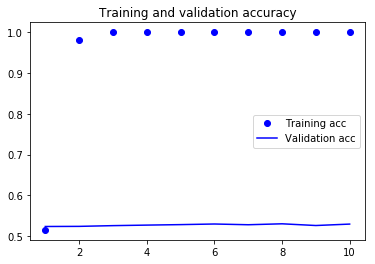

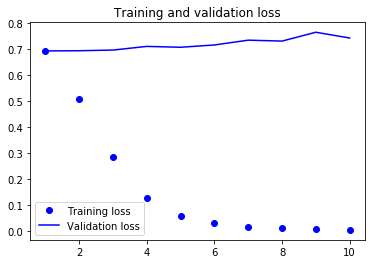

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()